<a href="https://colab.research.google.com/github/Manikanth0728/ML-Homework-Assignment-2/blob/main/ML_HW_Assignment2_mk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Q7. Decision Tree Classifier (max_depth = 1,2,3)
max_depth=1: train_acc=0.6667, test_acc=0.6667
max_depth=2: train_acc=0.9714, test_acc=0.8889
max_depth=3: train_acc=0.9810, test_acc=0.9778
Observation: Small depth → underfitting, higher depth → risk of overfitting.

Q8. kNN Decision Boundaries (features: sepal length & sepal width)


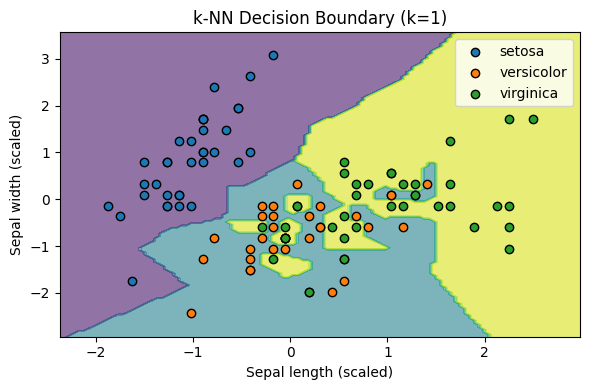

Saved decision boundary plot for k=1 → knn_boundary_k1.png


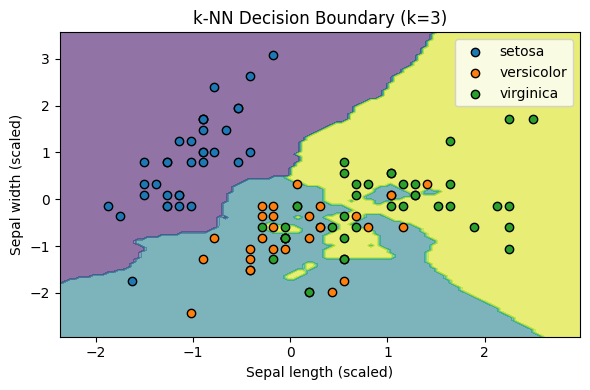

Saved decision boundary plot for k=3 → knn_boundary_k3.png


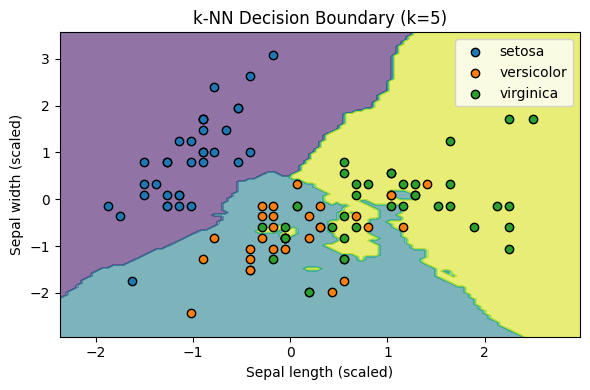

Saved decision boundary plot for k=5 → knn_boundary_k5.png


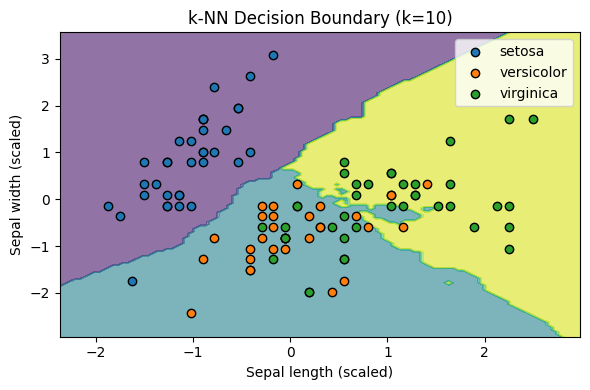

Saved decision boundary plot for k=10 → knn_boundary_k10.png
Observation: Small k → complex, wiggly boundaries. Larger k → smoother boundaries.

Q9. Performance Evaluation (k=5 kNN)
Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



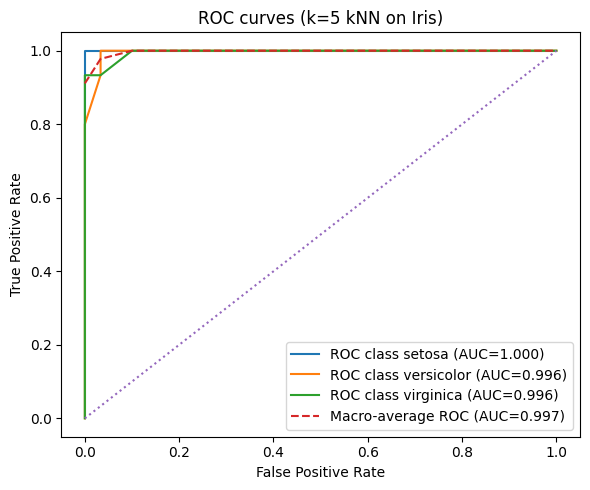

ROC curve saved → knn5_roc_auc.png


In [1]:
# CS5710 - Assignment 2
# Part B: Programming (Q7–Q9)
# University of Central Missouri
# Fall 2025

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# ==========================================================
# Load dataset
# ==========================================================
iris = datasets.load_iris()
X = iris.data
y = iris.target

# ==========================================================
# Q7. Decision Tree Classifier on Iris
# ==========================================================
print("\nQ7. Decision Tree Classifier (max_depth = 1,2,3)")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

for depth in [1, 2, 3]:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    print(f"max_depth={depth}: train_acc={train_acc:.4f}, test_acc={test_acc:.4f}")

print("Observation: Small depth → underfitting, higher depth → risk of overfitting.\n")

# ==========================================================
# Q8. kNN on 2 features with decision boundaries
# ==========================================================
print("Q8. kNN Decision Boundaries (features: sepal length & sepal width)")

# Use only sepal length & sepal width
X2 = X[:, :2]
scaler = StandardScaler()
X2s = scaler.fit_transform(X2)

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2s, y, test_size=0.3, random_state=42, stratify=y
)

def plot_decision_boundary(X_train, y_train, clf, title, fname):
    h = 0.05  # mesh step
    x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.6)
    for lbl in np.unique(y_train):
        idx = np.where(y_train == lbl)
        plt.scatter(X_train[idx, 0], X_train[idx, 1],
                    label=iris.target_names[lbl], edgecolors='k')
    plt.legend()
    plt.title(title)
    plt.xlabel("Sepal length (scaled)")
    plt.ylabel("Sepal width (scaled)")
    plt.tight_layout()
    plt.savefig(fname)
    plt.show()

# Train and plot for different k values
for k in [1, 3, 5, 10]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X2_train, y2_train)
    fname = f"knn_boundary_k{k}.png"
    plot_decision_boundary(X2_train, y2_train, knn,
                           f"k-NN Decision Boundary (k={k})", fname)
    print(f"Saved decision boundary plot for k={k} → {fname}")

print("Observation: Small k → complex, wiggly boundaries. Larger k → smoother boundaries.\n")

# ==========================================================
# Q9. Performance Evaluation (k=5)
# ==========================================================
print("Q9. Performance Evaluation (k=5 kNN)")

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train_all, y_train_all)
y_pred = knn5.predict(X_test_all)

# Confusion matrix
cm = confusion_matrix(y_test_all, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
report = classification_report(y_test_all, y_pred, target_names=iris.target_names)
print("Classification Report:\n", report)

# ROC & AUC (One-vs-Rest)
y_score = knn5.predict_proba(X_test_all)
y_test_binarized = label_binarize(y_test_all, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Macro-average ROC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curves
plt.figure(figsize=(6, 5))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             label=f"ROC class {iris.target_names[i]} (AUC={roc_auc[i]:.3f})")
plt.plot(fpr["macro"], tpr["macro"],
         label=f"Macro-average ROC (AUC={roc_auc['macro']:.3f})", linestyle='--')
plt.plot([0, 1], [0, 1], linestyle=':')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curves (k=5 kNN on Iris)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("knn5_roc_auc.png")
plt.show()

print(f"ROC curve saved → knn5_roc_auc.png")
